## Statistichal procedure for the data of the higgs boson

The following procedure is gathered from the CMS - NOTE 2011-005, and is the statistichal approach used to do an hypothesis test to determine wether the results for the higgs boson mass produced by the data is only created by background or an actual signal in combination with background.

We make the signal and the background functions of the nuiance parameter $\theta$, and denote them $s\left(\theta\right)$ and $b\left(\theta\right)$ respectfully.

1. Construct the likelyhood function
$$\mathcal{L}\left(\mbox{data}|\mu,\theta\right) = \mbox{Poisson}\left(\mbox{data}|\mu \cdot s\left(\theta\right) + b\left(\theta\right)\right)\cdot p\left(\tilde{\theta}|\theta\right)$$

* Data represents either actual experimental observation or pseudo-data used to construct sampling distributions

* $\mu$ is the signal strength modifier and $\theta$ represents the full suite of nuiance parameters

* Poissons(data|$\mu s + b$) stands for a product of Poisson probabilities to observe $n_i$ events in bins $i$:
$$\prod_{i} \frac{\left(\mu s_i + b_i\right)^{n_i}}{n_i !} e^{-\mu s_i - b_i}$$

2. To compare the compability of the data with the background -only and signal + background hypothesis, the test statistic $$\tilde{q_{\mu}} =  - 2ln \frac{\mathcal{L}\left(\mbox{data}|\mu,\hat{\theta_{\mu}}\right)}{\mathcal{L}\left(\mbox{data}|\hat{\mu},\hat{\theta_{\mu}}\right)},$$ with $0 \leq \hat{\mu} \leq \mu$. Where $\hat{\theta_{\mu}}$ refers to the conditional maximum likelyhood estimate of $\theta$, given the signal strength paramter $\mu$ and data. $\hat{\mu}$ and $\hat{\theta}$ correspond to the global maximum of the likelihood.

3. Find the observed value of the test statisitc $\tilde{q_{\mu}^{obs}}$ for the given signal strength modifier $\mu$ under test.

4. Find values of the nuisance paramters $\hat{\theta_{o}^{obs}}$ and $\hat{\theta}_{\mu}^{\mbox{obs}}$ best describing the experimentally observed data, for the background only and signal + background hypothesis, respectively. 

5. Use (a bit unsure because, in the CMS document it says generate toy monte carlo pseudo-data, but I assume that part is done, so I assume we are just supposed to use the generated one) the generated pseudo-data to construct $pdf$s $f\left(\tilde{q_{\mu}}|\mu, \hat{\theta}_{\mu}^{obs}\right)$ and $f\left(\tilde{q_{\mu}}|0, \hat{\theta}_{0}^{obs}\right)$ assuming a signal with strength $\mu$ in the signal + background hypothesis and for the background only hypothesis ($\mu = 0$).

6. Having constructed $f\left(\tilde{q_{\mu}}|\mu, \hat{\theta}_{\mu}^{obs}\right)$ and $f\left(\tilde{q_{\mu}}|0, \hat{\theta}_{0}^{obs}\right)$ distributions, define two p-values to be associated with the actual observation for the signal + background and background-only hypothesis, $p_{\mu}$ and $p_b$:
$$p_{\mu} = P\left(\tilde{q_{\mu}} \geq \tilde{q}_{\mu}^{obs}|\mbox{signal + background}\right) = \int_{\tilde{q}_{\mu}^{obs}}^{infty} f\left(\tilde{q}_{\mu}|\mu, \hat{\theta}_{\mu}^{obs}\right) d\tilde{q_{\mu}} $$

$$1- p_{b} = P\left(\tilde{q_{\mu}} \geq \tilde{q}_{\mu}^{obs}|\mbox{background only}\right) = \int_{\tilde{q}_{+0}^{obs}}^{infty} f\left(\tilde{q}_{\mu}|0, \hat{\theta}_{0}^{obs}\right) d\tilde{q_{\mu}}$$

and calculate $CL_{s}\left(\mu\right) = \frac{p_{\mu}}{1-p_{b}}$.

7. If, for $\mu = 1$, $CL_s \leq \alpha$, we would state that the SM Higgs boson is excluded with (1 - $\alpha$) confidence level.

8. To quote the 95$\%$ Confidence Level upper limit on $\mu$, to be further denoted as $\mu^{95\%CL}$ we adjust $\mu$ until we reach $CL_s = 0.05$.


Further the procedure states that the test statistic used for the higgs boson is $q_{\mu}$ with $\hat{\mu} \geq 0$. (see expression for $q_{\mu}$ above.)

In [1]:
#Useful packages
import pandas as pd
import scipy.stats as ss
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sp
import pyhf

In [75]:
#In this document we have neglected the error-parameter theta
#Veslemøy and Ema

In [47]:
#Uploading counts from data
sim_signal_counts = np.load(r'C:\Users\vesle\Desktop\Even_longer\signal.npy')
sim_background_counts = np.load(r'C:\Users\vesle\Desktop\Even_longer\background.npy')
true_counts = np.load(r'C:\Users\vesle\Desktop\Even_longer\true.npy')
#bins_data = np.load(r'C:\Users\vesle\Desktop\data\bins.npy')

In [43]:
print(len(sim_signal_counts))
print(len(sim_background_counts))
print(len(true_counts))

287
287
287


In [46]:
print(sim_background_counts)

[1.85073508e+00 8.72054259e+00 1.65341236e+01 3.82720245e+01
 1.20253027e+02 5.59794720e+01 1.37999427e+01 1.56715108e+01
 1.19951988e+01 3.05658876e+00 2.38846227e+00 2.85579284e+00
 3.36467399e+00 4.08982082e+00 8.91444875e+00 4.79407894e+00
 5.01170873e+00 1.31705145e+01 5.35294138e+00 5.47594025e+00
 5.56751395e+00 6.16357626e+00 9.89619532e+00 6.20345308e+00
 6.40426788e+00 3.34927910e+00 7.56378138e+00 6.67265062e+00
 6.72789788e+00 6.21945797e+00 1.00795454e+01 1.01917422e+01
 9.77397092e+00 7.06633852e+00 7.96675613e+00 1.06933883e+01
 8.30433158e+00 9.51916539e+00 1.12760308e+01 1.42437633e+01
 2.27601638e+01 3.03522406e+01 3.69837147e+01 4.25471772e+01
 4.46014572e+01 4.46028397e+01 4.35644963e+01 4.60056252e+01
 4.57309095e+01 4.48217778e+01 4.28766150e+01 4.32196606e+01
 4.09860313e+01 3.96991683e+01 4.17504587e+01 3.90567993e+01
 3.92104503e+01 3.48714357e+01 3.36784905e+01 3.30343916e+01
 3.12155806e+01 3.05214815e+01 2.86292805e+01 2.73823086e+01
 2.69347026e+01 2.679763

In [58]:
#Must be done for the final files that contain all contributions
#where the binsize is kept the same for both simulated and true data
#Then one can loop through the counts of the true file and the background + signal
#To get our test statistics

#def get_counts(df):
#    bin_size = 2.5
#    bins = np.arange(30, 200, bin_size)
#    counts = sp.stats.binned_statistic(df["invariant_mass"],df["weight"],statistic="sum",bins=bins)[2]
#    return counts

In [38]:
#We can assume the data we are getting in is an array of discrete counts;
#The likehoodfunction for each bin is given by the poisson distribution
#pmf(k, mu, loc=0)


#log of likelyhood function
def log_likelyhood(mu,s,b,n):
    """ s = number of events in bin i from sim.data
    b = number of events in bin i from sim.data
    n = number of events from real data """
    val = mu*s +b
    return(sum(np.log(ss.poisson.pmf(n,val))))


#need to evaluate the case with background only, aka mu = 0, and the case with
#both background and noise

def q_func(mu_1,mu_2,s,b,t,func=log_likelyhood):
    log_val = func(mu_1,s,b,t) - func(mu_2,s,b,t)
    return(-2*log_val)

In [69]:
#Finding q0_obs - This value is too big?
q_obs_0 = q_func(0,1,sim_signal_counts,sim_background_counts,true_counts)
print("q_obs_0: ",q_obs_0)

q_obs_0:  112.16917800027431


In [70]:
#Ratio of Likelyhood-functions with mu = 1 and mu = best fit 
q_obs_1 = q_func(1,0.8363411119510583,sim_signal_counts,sim_background_counts,true_counts)
print("q_obs_1: ",q_obs_1)

q_obs_1:  1.75000632707156


In [22]:
#Creating toy distributions

def create_toy(mu,s,b):
    """return a random poisson distributed value
    with mu*s + b of bin i as its expected value"""
    return (ss.poisson.rvs((mu*s+b),size=1))


def create_toy_distr(mu,s,b,func = create_toy):
    toys_list = np.zeros(len(s))
    for i in range(len(s)):
        toys_list[i] = func(mu,s[i],b[i])
    return(toys_list)

In [52]:
#creating a dataframe with toy distributions mimiking our true counts

#For mu = 0
toy_data_mu_0 = pd.DataFrame([])

for i in range(1000):
    toys = pd.DataFrame(create_toy_distr(0,sim_signal_counts, sim_background_counts))
    toy_data_mu_0 = pd.concat([toy_data_mu_0,toys],ignore_index=True,axis = 1)

In [54]:
#Slightly faster to sue numpy array and just convert to frame later, will change to this later
#For mu = 0
#toy_data_mu_0 = np.zeros((1000,len(sim_signal_counts)))

#for i in range(1000):
   # toys = create_toy_distr(0,sim_signal_counts, sim_background_counts)
   # toy_data_mu_0[i] = toys
    
#pd.DataFrame(toy_data_mu_0)

In [53]:
toy_data_mu_0

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.0,0.0,6.0,4.0,3.0,3.0,0.0,4.0,3.0,1.0,...,2.0,2.0,0.0,2.0,1.0,2.0,0.0,2.0,4.0,3.0
1,9.0,10.0,5.0,11.0,8.0,8.0,6.0,11.0,4.0,5.0,...,4.0,8.0,11.0,9.0,10.0,12.0,12.0,9.0,11.0,10.0
2,6.0,16.0,16.0,22.0,23.0,18.0,14.0,19.0,15.0,11.0,...,14.0,11.0,13.0,15.0,10.0,19.0,23.0,16.0,13.0,13.0
3,39.0,40.0,40.0,45.0,37.0,47.0,52.0,41.0,41.0,43.0,...,39.0,34.0,38.0,43.0,38.0,45.0,40.0,43.0,30.0,30.0
4,91.0,120.0,124.0,117.0,133.0,112.0,111.0,112.0,108.0,139.0,...,115.0,131.0,122.0,129.0,133.0,111.0,110.0,105.0,124.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
284,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
285,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
toy_data_mu_1 = pd.DataFrame([])

for i in range(1000):
    toys = pd.DataFrame(create_toy_distr(1,sim_signal_counts, sim_background_counts))
    toy_data_mu_1 = pd.concat([toy_data_mu_1,toys],ignore_index=True,axis = 1)

In [59]:
toy_data_mu_1

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,3.0,1.0,2.0,4.0,3.0,1.0,4.0,3.0,2.0,5.0,...,2.0,3.0,0.0,2.0,1.0,2.0,4.0,2.0,0.0,2.0
1,11.0,9.0,7.0,10.0,8.0,12.0,12.0,4.0,8.0,9.0,...,10.0,8.0,10.0,13.0,12.0,8.0,9.0,5.0,7.0,13.0
2,14.0,14.0,11.0,19.0,12.0,15.0,15.0,19.0,16.0,20.0,...,23.0,16.0,19.0,13.0,18.0,19.0,13.0,18.0,15.0,12.0
3,41.0,35.0,34.0,30.0,37.0,40.0,37.0,41.0,38.0,48.0,...,40.0,35.0,36.0,39.0,45.0,59.0,42.0,44.0,44.0,45.0
4,116.0,106.0,119.0,110.0,113.0,124.0,127.0,94.0,105.0,107.0,...,119.0,121.0,125.0,119.0,125.0,117.0,108.0,132.0,108.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [192]:
#Want to optimize mu with regards to the likelihood function
#Can use scipy.optimize.minimize

#General algorithm to find best fit of mu for the log_like of a given dataset
fun = lambda mu: -log_likelyhood(mu,s,b,n)

sp.optimize.minimize(fun,0.5,bounds=((0,1),))

In [60]:
#testing with our initial dataset
fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,true_counts)
mu_opt = sp.optimize.minimize(fun,0.5,bounds=((0,1),))
print("The best fit value of mu for our original data is: ",mu_opt["x"][0])

The best fit value of mu for our original data is:  0.8363411119510583


In [55]:
#Need to make a loop where we loop over all the different toy-datasets
#and calculate the optimal mu for each of them

n_toys = len(toy_data_mu_0.iloc[0,:])
mu_s_0 = np.zeros(n_toys)

#With mu equal to 0
for i in range(n_toys):
    index = i
    fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,toy_data_mu_0.iloc[:,index])
    mu_opt_i = sp.optimize.minimize(fun,0.5,bounds=((0,1),))["x"]
    mu_s_0[i] = mu_opt_i

In [56]:
print(mu_s_0)

[0.00000000e+00 0.00000000e+00 2.09840065e-02 0.00000000e+00
 0.00000000e+00 1.22561277e-01 0.00000000e+00 9.43820382e-02
 2.67592953e-02 7.24066595e-02 4.84264581e-02 0.00000000e+00
 7.62128431e-03 5.88230931e-02 1.06691616e-02 1.08735033e-01
 0.00000000e+00 4.84979861e-03 5.89729099e-02 0.00000000e+00
 0.00000000e+00 9.36691080e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.16534149e-02 1.42774724e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.77083020e-03 1.46537647e-01 1.95013253e-03 1.38994680e-02
 1.45423081e-01 0.00000000e+00 0.00000000e+00 1.83486188e-01
 8.28084568e-02 7.81834402e-03 9.15233486e-03 0.00000000e+00
 9.15872603e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.38038067e-02 4.77319658e-02
 0.00000000e+00 0.00000000e+00 1.00994632e-01 3.06527938e-02
 6.28238628e-02 0.00000000e+00 6.48478424e-02 3.74612771e-02
 2.91291463e-02 0.00000000e+00 0.00000000e+00 4.30881758e-02
 4.67708568e-03 0.000000

In [61]:
#With mu equal to 1
mu_s_1 = np.zeros(n_toys)

for i in range(n_toys):
    index = i
    fun = lambda mu: -log_likelyhood(mu,sim_signal_counts,sim_background_counts,toy_data_mu_1.iloc[:,index])
    mu_opt_i = sp.optimize.minimize(fun,0.5,bounds=((0,1),))["x"]
    mu_s_1[i] = mu_opt_i

In [62]:
print(mu_s_1)

[1.         1.         1.         0.93822732 0.98739091 1.
 1.         0.99343844 1.         1.         0.84048645 1.
 1.         1.         1.         1.         0.94746751 0.77185719
 0.85544014 0.92731533 1.         0.78518862 1.         0.99196844
 0.8854259  1.         1.         1.         1.         0.98824041
 0.99614619 0.74763727 0.94826329 1.         1.         0.87059868
 1.         0.89190228 1.         1.         0.72029615 0.89770654
 1.         0.94221346 1.         0.98170053 1.         0.98294751
 0.9676772  1.         1.         1.         0.93984949 1.
 1.         1.         1.         1.         1.         0.89205102
 0.97718988 0.98208022 0.91413011 0.86331008 1.         1.
 1.         1.         0.92109158 0.9076352  1.         0.82686616
 1.         1.         1.         0.89095645 0.97709075 0.80398557
 0.91658586 1.         0.78945747 0.93394747 0.96155377 0.92858321
 1.         0.83708553 1.         1.         0.74189246 0.85471091
 0.97656038 0.9864033  1.  

In [63]:
#Creating q's with mu=1 and | mu=0
num = len(toy_data_mu_0.iloc[0,:])
q_0_1s = np.zeros(num)

for i in range(num):
    q_0_1s[i] = q_func(1,mu_s_0[i],sim_signal_counts,sim_background_counts,toy_data_mu_0.iloc[:,i])

In [64]:
#Creating q's with mu=1 and | mu=1
num = len(toy_data_mu_1.iloc[0,:])
q_1_1s = np.zeros(num)

for i in range(num):
    q_1_1s[i] = q_func(1,mu_s_1[i],sim_signal_counts,sim_background_counts,toy_data_mu_1.iloc[:,i])

In [65]:
print(q_0_1s)

[ 95.34252893 103.73388693  95.9359108  116.80200957 112.06592697
  68.59953766 105.65787097  76.33709304  84.39776396  76.848466
  82.63884013 107.11735026  92.40671247  83.10204041  90.05761339
  69.16083637 111.71804012  96.11319002  83.21931299  96.96597548
 125.23906445  93.6203691  109.48521181 104.07301363  92.046919
  79.93072018  93.39243721  91.6065921  110.08522253 103.97697976
 106.60473533 103.23395838  97.03752032  65.10678042  94.45938597
  93.70635014  64.72117239  99.98640149 120.12993918  58.56320112
  74.11872423  92.37273475  94.9289064   93.47716876  92.26461968
 101.07948151 105.8763705  116.58759977 126.55788112 105.6430071
  77.72360836  81.48266208 111.21254526 101.23856427  69.81230492
  85.05046306  80.98785464 119.17319656  78.70400419  90.81182754
  86.64324272 107.831703    98.28879942  87.51199582  92.3006569
  96.57216209  86.85992653 113.78447331  82.48825497 106.10220328
 107.05484917 113.71584483 116.18299429  92.02005355 101.91455449
 113.86873081  9

In [66]:
print(q_1_1s)

[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.48601756e-01
  1.02592373e-02 -0.00000000e+00 -0.00000000e+00  2.85196746e-03
 -0.00000000e+00 -0.00000000e+00  1.72628164e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.80341201e-01  3.54324638e+00  1.39376993e+00  3.52129212e-01
 -0.00000000e+00  3.14337161e+00 -0.00000000e+00  4.11114563e-03
  8.59709287e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  8.88649709e-03  9.58960194e-04  4.46306128e+00
  1.79468772e-01 -0.00000000e+00 -0.00000000e+00  1.15335277e+00
 -0.00000000e+00  7.74974215e-01 -0.00000000e+00 -0.00000000e+00
  5.47323163e+00  7.06851577e-01 -0.00000000e+00  2.25469487e-01
 -0.00000000e+00  2.16939184e-02 -0.00000000e+00  1.88438882e-02
  6.84961798e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.41065029e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  7.89489636e-01
  3.41657549e-02  2.13317

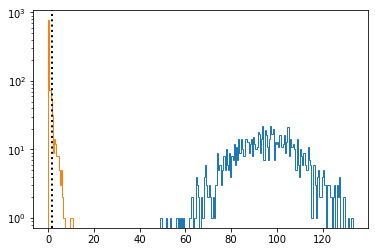

In [72]:
histogram_0 = plt.hist(q_0_1s, bins = np.arange(min(q_0_1s),max(q_0_1s) + 0.5,0.5),histtype = 'step',facecolor='c')
histogram_1 = plt.hist(q_1_1s, bins = np.arange(min(q_1_1s),max(q_1_1s) + 0.5,0.5),histtype = 'step',facecolor='c')
plt.axvline(q_obs_1, color='black', linestyle='dotted', linewidth=2)
plt.yscale('log')
#plt.xlim((0,30))

In [73]:
#We have put in the line for q_obs_1, which is the q-funciton evaluated with mu_1 = 1 and mu_2 = best fit 
#We get that this is very low, much lower than in the cms-document. The value for q with the ratio of no signal vs. best fit
#is very high however, so we are not sure if that is correct. Also, our toy distributions for mu = 1 and mu = 0 do
#not overlap at all. Usually this would be the ideal case, but we were thinking we may have done something wrong as
#as we assumed they would be a bit more overlapping as in the CMS-case.